# Importing files and modules , csv to read the required column names ,using librosa to get those features.

In [157]:
import os
import json
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
import librosa
import librosa.display
import librosa.feature
import librosa.effects

## Using the 30 second features

In [160]:
df=pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [162]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

## _________________________________________________________________________

## First using the csv file we will train a model a simple one 

In [186]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

encoder = LabelEncoder()
df['label']=encoder.fit_transform(df['label'])

In [187]:
X=df.drop(columns=["filename","label","length"])

In [188]:
from sklearn.model_selection import train_test_split
y = df["label"]  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [167]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.655


In [168]:
svc = SVC(kernel='rbf', C=1.0) 
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

SVC Accuracy: 0.7


In [169]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
xgb1.fit(X_train, y_train)
y_pred_xgb = xgb1.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.735


In [87]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

models = {
    "RandomForest": rf,
    "SVC": svc,
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": lgb.LGBMClassifier(verbosity=-1, force_col_wise=True)
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} Average Accuracy: {scores.mean():.4f}")

RandomForest Average Accuracy: 0.5550
SVC Average Accuracy: 0.5900
XGBoost Average Accuracy: 0.6000
LightGBM Average Accuracy: 0.5900


In [170]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

xgb_random = RandomizedSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    param_distributions=param_dist,
    n_iter=10,  
    cv=5,  
    verbose=1,
    n_jobs=-1  
)

xgb_random.fit(X_train, y_train)
print(xgb_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}


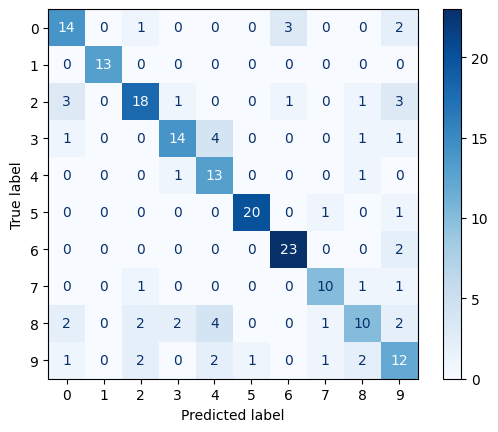

In [172]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

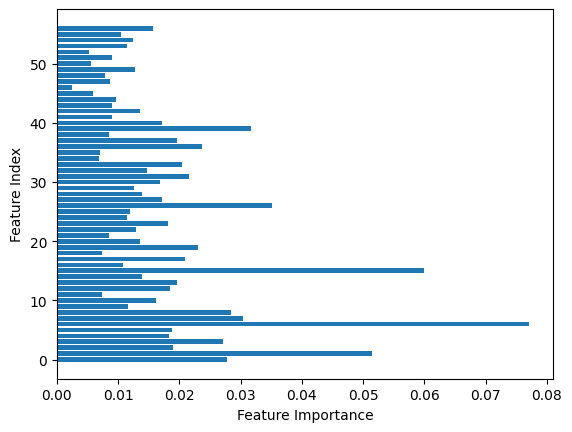

In [173]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb_random = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_random.fit(X_train, y_train)

plt.barh(range(len(xgb_random.feature_importances_)), xgb_random.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.show()

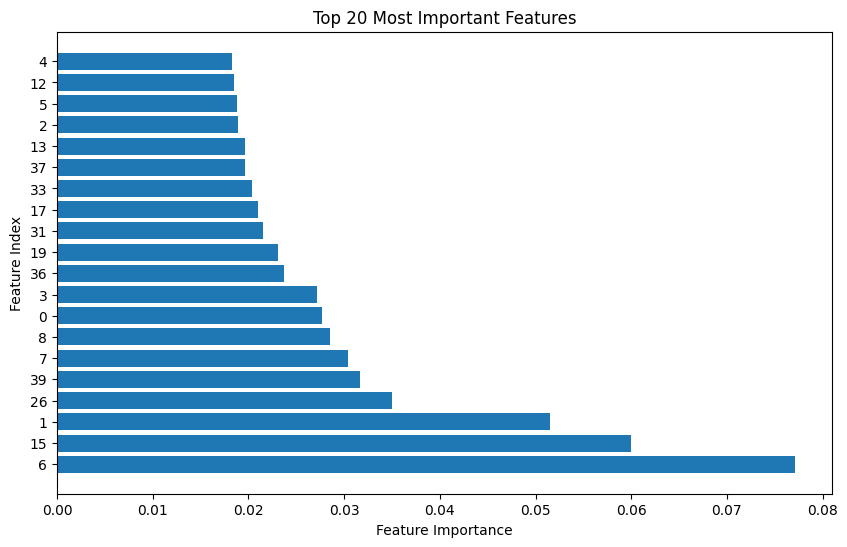

In [174]:
import numpy as np
importances = xgb_random.feature_importances_
indices = np.argsort(importances)[::-1]  
plt.figure(figsize=(10, 6))
plt.barh(range(20), importances[indices[:20]])
plt.yticks(range(20), indices[:20])  
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("Top 20 Most Important Features")
plt.show()

In [207]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb

importances = xgb_random.feature_importances_
indices = np.argsort(importances)[::-1]  

top_features = indices[:15]

feature_names = df.drop(columns=['filename','label']).columns  

selected_feature_names = feature_names[top_features] 

X_train_selected = X_train[:, top_features]
X_test_selected = X_test[:, top_features]
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected) 

xgb_1 = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
xgb_1.fit(X_train_scaled, y_train)

y_pred = xgb_1.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with top features:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy with top features: 0.62
Confusion Matrix:
 [[13  0  0  0  0  1  1  0  1  4]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 3  0 14  0  0  0  0  1  1  8]
 [ 1  0  0  9  6  0  3  0  0  2]
 [ 0  0  0  1  8  0  0  0  6  0]
 [ 1  0  0  1  0 18  0  0  0  2]
 [ 0  0  0  1  0  0 22  0  0  2]
 [ 0  0  1  0  0  0  1 10  1  0]
 [ 0  0  3  3  3  0  1  1  8  4]
 [ 0  0  2  4  1  1  1  2  1  9]]


In [208]:
rf_model_selected = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_selected.fit(X_train_scaled, y_train)

y_pred_rf = rf_model_selected.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy with top features:", accuracy_rf)

conf_matrix1 = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix1)

Random Forest Accuracy with top features: 0.655
Confusion Matrix:
 [[16  1  0  0  0  0  0  0  0  3]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 2  0 16  1  0  2  0  0  2  4]
 [ 0  0  0 12  5  0  3  0  0  1]
 [ 0  0  0  1  8  0  0  2  4  0]
 [ 2  0  0  0  0 19  1  0  0  0]
 [ 0  0  0  1  1  0 22  0  0  1]
 [ 1  0  1  0  0  0  0  8  2  1]
 [ 0  0  3  5  4  0  0  0 10  1]
 [ 0  0  3  4  2  2  1  1  1  7]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20, 
    cv=5,  
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train_selected, y_train)

print("Best Parameters:", rf_random.best_params_)

best_rf = rf_random.best_estimator_
y_pred_rf = best_rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy (Tuned):", accuracy)

In [178]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_1),
    ('rf', rf_model_selected)
], voting='soft')

ensemble_model.fit(X_train_selected, y_train)

y_pred = ensemble_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", accuracy)

Ensemble Model Accuracy: 0.755


In [179]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=[
    ('xgb', xgb_1),
    ('rf', rf_model_selected)
], final_estimator=meta_model)

stacking_model.fit(X_train_selected, y_train)

y_pred = stacking_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Stacking Model Accuracy:", accuracy)

Stacking Model Accuracy: 0.765


In [209]:
import numpy as np
from sklearn.metrics import accuracy_score

xgb_pred_proba = xgb_1.predict_proba(X_test_scaled)
rf_pred_proba = rf_model_selected.predict_proba(X_test_scaled)

weight_xgb = 0.5
weight_rf = 0.5

blended_proba = (weight_xgb * xgb_pred_proba) + (weight_rf * rf_pred_proba)
blended_pred = np.argmax(blended_proba, axis=1)

accuracy = accuracy_score(y_test, blended_pred)
print("Blended Model Accuracy:", accuracy)

Blended Model Accuracy: 0.625


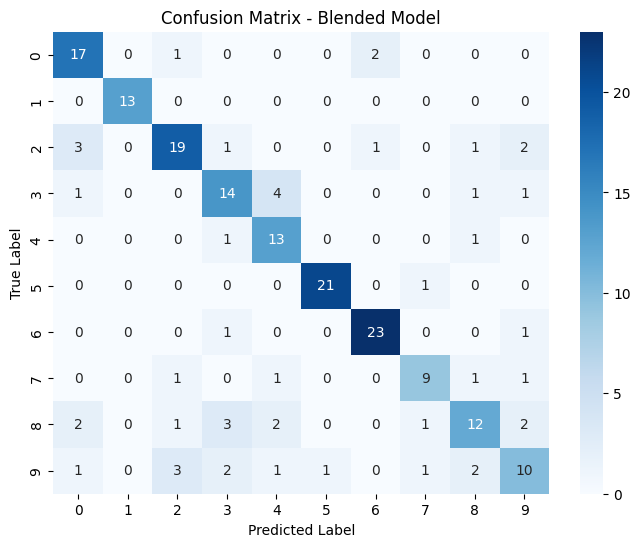

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, blended_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Blended Model")
plt.show()

In [ ]:
import joblib

joblib.dump(xgb1, "xgb_model.pkl")
joblib.dump(rf_model_selected, "rf_model.pkl")

blending_params = {"weight_xgb": 0.2, "weight_rf": 0.8}
joblib.dump(blending_params, "blending_params.pkl")

print("Models and blending parameters saved successfully!")

In [200]:
print(list(selected_feature_names))

['spectral_centroid_var', 'perceptr_mean', 'chroma_stft_mean', 'mfcc5_mean', 'mfcc11_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'length', 'rms_mean', 'mfcc10_mean', 'mfcc1_var', 'mfcc7_var', 'tempo', 'mfcc8_var', 'mfcc10_var', 'harmony_mean', 'chroma_stft_var', 'spectral_centroid_mean', 'zero_crossing_rate_var', 'rms_var', 'mfcc3_var', 'mfcc12_mean', 'mfcc5_var', 'mfcc7_mean', 'rolloff_var', 'mfcc20_mean', 'mfcc8_mean', 'mfcc6_mean', 'harmony_var', 'mfcc2_mean', 'mfcc13_mean', 'mfcc3_mean', 'mfcc16_var', 'mfcc6_var', 'mfcc19_mean', 'mfcc4_var', 'rolloff_mean', 'mfcc18_var', 'mfcc4_mean', 'perceptr_var', 'mfcc19_var', 'mfcc14_mean', 'mfcc17_var', 'mfcc13_var', 'mfcc12_var', 'mfcc15_var', 'mfcc2_var', 'mfcc11_mean', 'mfcc16_mean', 'zero_crossing_rate_mean', 'mfcc1_mean', 'mfcc9_var']


# Audio Input Feature Extraction

In [211]:
import librosa
import numpy as np

def extract_features(audio):
    y,sr=librosa.load(audio,sr=None)

    features = {
        "spectral_bandwidth_mean": np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        "perceptr_var": np.var(librosa.feature.spectral_contrast(y=y, sr=sr)),
        "chroma_stft_var": np.var(librosa.feature.chroma_stft(y=y, sr=sr)),
        "length": len(y),
        "mfcc5_var": np.var(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)[4]),
        "mfcc12_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)[11]),
        "rolloff_mean": np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        "spectral_bandwidth_var": np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        "mfcc8_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)[7]),
        "chroma_stft_mean": np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        "mfcc4_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)[3]),
        "harmony_var": np.var(librosa.effects.harmonic(y)),
        "harmony_mean": np.mean(librosa.effects.harmonic(y)),
        "rms_var": np.var(librosa.feature.rms(y=y)),
        "mfcc11_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)[10]),
    }

    return np.array([features[feat] for feat in features])  

In [212]:
audio_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav"
features=extract_features(audio_path)

In [213]:
features

array([ 2.00241241e+03,  7.68011910e+01,  8.87716636e-02,  6.61794000e+05,
        1.67992889e+02,  8.80208778e+00,  3.80572303e+03,  8.58344104e+04,
        1.53398018e+01,  3.50128502e-01,  4.23639412e+01,  8.17246269e-03,
       -4.90663515e-05,  2.82838009e-03, -8.32606125e+00])

In [214]:
features_array = features.reshape(1, -1)  

features_scaled = scaler.transform(features_array) 

In [215]:
xgb_pred_proba = xgb_1.predict_proba(features_scaled)
rf_pred_proba = rf_model_selected.predict_proba(features_scaled)

blended_proba = (weight_xgb * xgb_pred_proba) + (weight_rf * rf_pred_proba)

blended_pred = np.argmax(blended_proba, axis=1)
print("Predicted Genre:", blended_pred[0])

Predicted Genre: 4


label
1    87
7    87
4    85
0    80
9    79
3    79
5    78
8    77
6    75
2    73
Name: count, dtype: int64


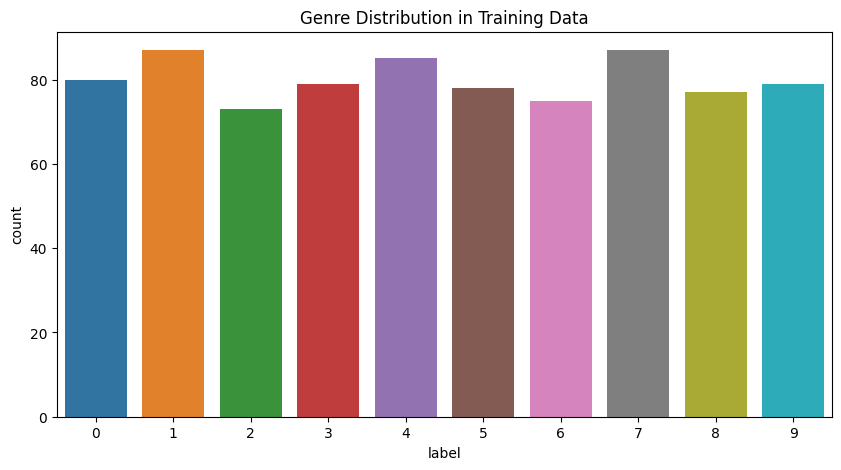

In [216]:
import seaborn as sns

print(y_train.value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x=y_train)
plt.title("Genre Distribution in Training Data")
plt.show()